<a href="https://colab.research.google.com/github/Err0rGCeni/IAExp_NLP/blob/main/PLN02_spaCy_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processamento de Linguagem Naturall com spaCy e Python

## Introdução spaCy

In [1]:
!pip install spacy --upgrade

import string
import spacy
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spacy import displacy
from spacy.lang.pt.stop_words import STOP_WORDS

nltk.download('rslp')
## print(spacy.__version__)

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [2]:
# Pacote Português
# !python -m spacy download pt
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 27.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### Part-of-Speech (.poos)

> part of speech, lexical category to which a word is assigned based on its function in a sentence.

**POS** se refere a uma categoria gramatical qque descreve a função de uma palavra em uma sentença.

In [3]:
#pln = spacy.load('pt')
pln = spacy.load('pt_core_news_sm')
print(pln)
my_doc = pln("Estamos aprendendo sobre Processamento de Linguagem Natural")

In [4]:
for token in my_doc:
  print(token.text, token.pos_)
  if token.pos_ == "VERB":
    print("AÇÃO: ", token.text)

Estamos AUX
aprendendo VERB
AÇÃO:  aprendendo
sobre ADP
Processamento PROPN
de ADP
Linguagem PROPN
Natural PROPN


### Stemming (.stem) and Lemmatization (.lemma_)

 A *Stemming* remove os afixos das palavras, enquanto a *Lemmatization* retorna as palavras ao seu dicionário ou forma básica, considerando o contexto e o significado.

In [5]:
stemmer  = nltk.stem.RSLPStemmer()
print("Palavra / Lemma / Stem")
for token in my_doc:
  print(token.text, token.lemma_, stemmer.stem(token.text))

Palavra / Lemma / Stem
Estamos estar est
aprendendo aprender aprend
sobre sobre sobr
Processamento Processamento process
de de de
Linguagem Linguagem lingu
Natural Natural natur


In [6]:
stemmer  = nltk.stem.RSLPStemmer()
print(stemmer.stem("aprendendo"))

aprend


### Named-Entity Recognition (.label_)

> Entidade Nomeada: Expressão que pode ser extraída de um texto e é essencial para compreender, concluir ou ignorar um determinado contexto ou ação.

Tem como objetivo identificar e classificar entidades nomeadas presentes em textos escritos em linguagem natural.

In [7]:
text = "A IBM é uma empresa dos Estados Unidos voltada para a área de informmática. Sua sede no brasil fica em São Paulo com receita de 120 milhões de dólares."

my_doc = pln(text)
for ent in my_doc.ents:
  print(ent.text, ent.label_)

displacy.render(my_doc, style="ent", jupyter=True)

IBM ORG
Estados Unidos LOC
brasil LOC
São Paulo LOC


In [8]:
text = "Enquanto conceito psicanalítico, o delírio ligado à produção de um certo saber, contribui para a colocação em cena cuja resistência é sempre do analista."

my_doc = pln(text)
for ent in my_doc.ents:
  print(ent.text, ent.label_)

displacy.render(my_doc, style="ent", jupyter=True)

/usr/local/lib/python3.11/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


### Stop Words (STOP_WORDS)

Palavras que aparecem com mmuita frequência e que não representam muito significado, sendo dispensáveis.

In [9]:
print(len(STOP_WORDS))
print(STOP_WORDS)
print(pln.vocab["ir"].is_stop)
print(pln.vocab["caminhar"].is_stop)

for token in my_doc:
  if pln.vocab[token.text].is_stop:
    print(token.text)

416
{'outros', 'fim', 'grupo', 'ademais', 'ela', 'tua', 'nossas', 'onze', 'fazes', 'oito', 'tudo', 'temos', 'após', 'depois', 'duas', 'final', 'for', 'iniciar', 'disso', 'meus', 'naquele', 'além', 'sois', 'possível', 'cima', 'parte', 'maiorias', 'também', 'de', 'têm', 'és', 'tiveste', 'próximo', 'tais', 'quer', 'lado', 'mal', 'mas', 'tenho', 'estará', 'aqueles', 'quais', 'pode', 'seria', 'fora', 'tu', 'quando', 'oitava', 'até', 'questão', 'sétimo', 'poderá', 'dizem', 'eventual', 'des', 'mesmo', 'aí', 'aquele', 'ali', 'vós', 'esta', 'dez', 'faz', 'maioria', 'novas', 'vindo', 'os', 'essas', 'então', 'qualquer', 'podem', 'tanto', 'deste', 'último', 'relação', 'vez', 'neste', 'a', 'tive', 'umas', 'conhecido', 'esses', 'breve', 'dos', 'poder', 'primeiro', 'em', 'novo', 'e', 'está', 'cedo', 'vinte', 'corrente', 'nosso', 'porque', 'somos', 'me', 'embora', 'que', 'foi', 'qual', 'vários', 'vossa', 'mês', 'quarto', 'meu', 'máximo', 'você', 'desde', 'assim', 'teve', 'tão', 'posso', 'cujo', 'coisa

### Dependecy Parsing

Técnica para identificar as relações gramaticais entre palavras em uma sentença.

In [10]:
my_doc = pln("Reserve uma passagem saindo de Guarulhos e chegando em Curitiba.")

origem = my_doc[5]
destino = my_doc[9]

print(list(origem.ancestors))
print(list(destino.ancestors))

[saindo, passagem, Reserve]
[chegando, saindo, passagem, Reserve]


In [11]:
my_doc = pln("Reserva de uma mesa para  o restaurante e de um táxi para o hotel.")
displacy.render(my_doc, style="dep", jupyter=True, options={"distance": 90})

In [12]:
print(list(my_doc[3].ancestors))
print(list(my_doc[3].children))

[Reserva]
[de, uma, restaurante]


### Semelhança entre Palavras e Textos (GloVe, .similarity)



In [13]:
p1 = pln("Olá.")
p2 = pln("Oi.")
p3 = pln("Ou")

print(p1.similarity(p2))
print(p1.similarity(p3))
print(p2.similarity(p3))

0.8432958888657702
0.2243510337570625
0.28344266321119965


<ipython-input-13-33a159264a6e>:5: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(p1.similarity(p2))
<ipython-input-13-33a159264a6e>:6: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead

In [14]:
texto = pln("gato cachorro cavalo pessoa")
for texto1 in texto:
  print("- - - - ->", texto1)
  for texto2 in texto:
    print(texto2, texto1.similarity(texto2))

- - - - -> gato
gato 1.0
cachorro 0.45607784390449524
cavalo 0.3186897933483124
pessoa 0.34087660908699036
- - - - -> cachorro
gato 0.45607784390449524
cachorro 1.0
cavalo 0.4753359854221344
pessoa 0.19905608892440796
- - - - -> cavalo
gato 0.3186897933483124
cachorro 0.4753359854221344
cavalo 1.0
pessoa 0.3189845383167267
- - - - -> pessoa
gato 0.34087660908699036
cachorro 0.19905608892440796
cavalo 0.3189845383167267
pessoa 1.0


<ipython-input-14-4b079b5525c8>:5: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(texto2, texto1.similarity(texto2))


### Tokenization


In [15]:
my_txt = "Estamoos aprendendo sobre processamento de linguagem natural, curso pela internet"

print("pln -> Token")

for token in pln(my_txt):
  print(token)

print("py -> split")
print(my_txt.split())

pln -> Token
Estamoos
aprendendo
sobre
processamento
de
linguagem
natural
,
curso
pela
internet
py -> split
['Estamoos', 'aprendendo', 'sobre', 'processamento', 'de', 'linguagem', 'natural,', 'curso', 'pela', 'internet']


## Classificação de Sentimentos

In [16]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

from spacy.training import Example

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
BASE_DIR = '/content/drive/MyDrive/Colab Files/IAExp/PLN02'
base_dados = pd.read_csv(f"{BASE_DIR}/base_treinamento.txt",
encoding = 'utf-8')

print(base_dados.shape)

(196, 2)


In [19]:
base_dados.head()

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria


In [20]:
base_dados.tail()

,texto,emocao
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo
195,isso me apavora,medo


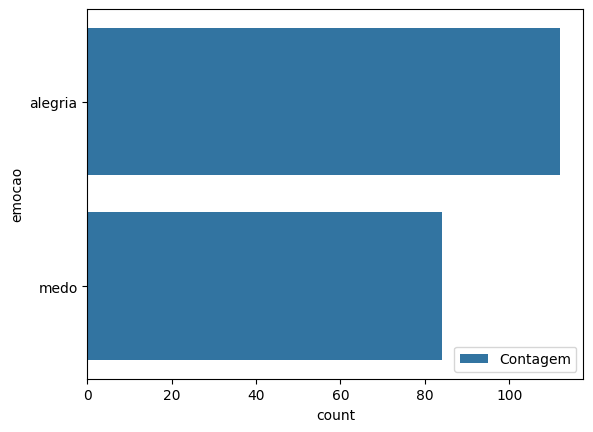

In [21]:
sns.countplot(y='emocao', data=base_dados, label = 'Contagem');

### Pré-Processamento dos Textos

In [22]:
print(STOP_WORDS, '\n', len(STOP_WORDS))
print(string.punctuation, '\n', len(string.punctuation))

pln = spacy.load('pt_core_news_sm')

{'outros', 'fim', 'grupo', 'ademais', 'ela', 'tua', 'nossas', 'onze', 'fazes', 'oito', 'tudo', 'temos', 'após', 'depois', 'duas', 'final', 'for', 'iniciar', 'disso', 'meus', 'naquele', 'além', 'sois', 'possível', 'cima', 'parte', 'maiorias', 'também', 'de', 'têm', 'és', 'tiveste', 'próximo', 'tais', 'quer', 'lado', 'mal', 'mas', 'tenho', 'estará', 'aqueles', 'quais', 'pode', 'seria', 'fora', 'tu', 'quando', 'oitava', 'até', 'questão', 'sétimo', 'poderá', 'dizem', 'eventual', 'des', 'mesmo', 'aí', 'aquele', 'ali', 'vós', 'esta', 'dez', 'faz', 'maioria', 'novas', 'vindo', 'os', 'essas', 'então', 'qualquer', 'podem', 'tanto', 'deste', 'último', 'relação', 'vez', 'neste', 'a', 'tive', 'umas', 'conhecido', 'esses', 'breve', 'dos', 'poder', 'primeiro', 'em', 'novo', 'e', 'está', 'cedo', 'vinte', 'corrente', 'nosso', 'porque', 'somos', 'me', 'embora', 'que', 'foi', 'qual', 'vários', 'vossa', 'mês', 'quarto', 'meu', 'máximo', 'você', 'desde', 'assim', 'teve', 'tão', 'posso', 'cujo', 'coisa', '

In [23]:
def preprocessamento(texto):
  # Lemma - STOP_WORDS - Pontuação
  documento = pln(texto)
  lista = []

  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_.lower().strip())

  lista = [palavra for palavra in lista if palavra not in STOP_WORDS and palavra not in string.punctuation]
  lista = " ".join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [24]:
texto = "Estamos aprendendo processamento de linguagem natural, curso pela internet"

teste = preprocessamento(texto)
print(teste)

aprender processamento linguagem natural curso por o internet



### Pré-Processamento da Base de Dados

In [25]:
base_dados.head(7)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria


In [26]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [27]:
base_dados.head(7)

,texto,emocao
0,trabalho agradável,alegria
1,gostar ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria
5,adorar cabelo macio,alegria
6,adorar cor de o olho,alegria


### Tratammento da Classe

Conversão de dict para list

`[[frase1, {'ALEGRIA': True, 'MEDO': false}], [frase2, {'ALEGRIA': True, 'MEDO': false}], ...]`


In [28]:
base_dados_final = []

for texto, emocao in zip(base_dados["texto"], base_dados["emocao"]):
  if emocao == 'alegria':
    dic = ({'ALEGRIA': True, 'MEDO': False})
  else:
    dic = ({'ALEGRIA': False, 'MEDO': True})

  base_dados_final.append([texto, dic.copy()])

print(base_dados_final[0])
print(len(base_dados_final))
print(base_dados.shape)

['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}]
196
(196, 2)


### Criação do Classificador

In [29]:
# V3.0: add já inclui o create. textcat já é mutualmente exclusivo
modelo = spacy.blank('pt')
textcat = modelo.add_pipe("textcat")
textcat.add_label("ALEGRIA")
textcat.add_label("MEDO")
historico = []

In [30]:
print(modelo.analyze_pipes)

<bound method Language.analyze_pipes of <spacy.lang.pt.Portuguese object at 0x78f4f90d5e90>>


### Treinamento do Algoritmo

In [31]:
modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  losses = {}

  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
            textos, annotations
        )]
    modelo.update(examples, losses=losses)

  if epoca % 100 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 1.711554542183876}
{'textcat': 3.124584423662424e-11}
{'textcat': 4.149100469664005e-12}
{'textcat': 1.0296888802762208e-12}
{'textcat': 3.660209749222279e-13}
{'textcat': 1.5147915575694764e-13}
{'textcat': 7.166882223726438e-14}
{'textcat': 3.258562683735016e-14}
{'textcat': 1.814190815362961e-14}
{'textcat': 9.214394606569788e-15}


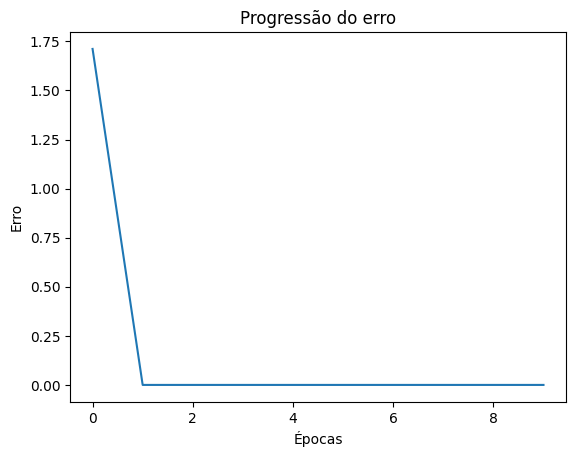

In [32]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

historico_loss = np.array(historico_loss)

plt.plot((historico_loss))
plt.title("Progressão do erro")
plt.xlabel("Épocas")
plt.ylabel("Erro")
plt.show()

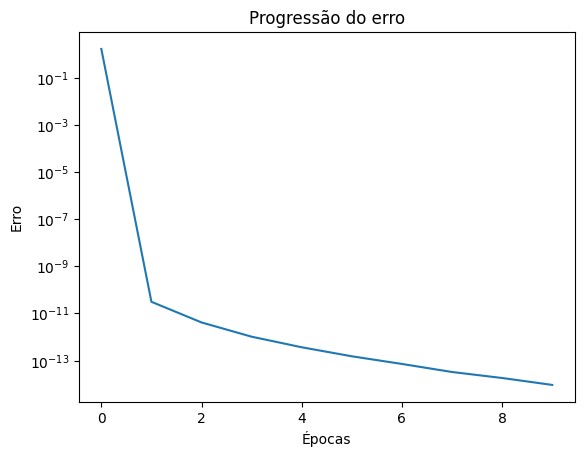

In [33]:
historico_loss = []
for i in historico:
  # Assuming 'textcat' is the key for the loss
  historico_loss.append(i.get('textcat'))

historico_loss = np.array(historico_loss)

plt.plot(historico_loss)
plt.title("Progressão do erro")
plt.xlabel("Épocas")
plt.ylabel("Erro")
# Set the y-axis to logarithmic scale
plt.yscale('log')

plt.show()

In [34]:
modelo.to_disk("modelo_pln02")

### Testes

In [35]:
modelo_carregado = spacy.load("modelo_pln02")

texto_positivo = preprocessamento("Eu adoro a cor dos seus olhos")

previsao = modelo_carregado(texto_positivo)
print(previsao.cats)

{'ALEGRIA': 1.0, 'MEDO': 1.3535855103441463e-08}


In [36]:
modelo_carregado = spacy.load("modelo_pln02")

texto_negativo = preprocessamento("Eu estou com medo  dele")

previsao = modelo_carregado(texto_negativo)
print(previsao.cats)

{'ALEGRIA': 1.7766503788152477e-06, 'MEDO': 0.9999982118606567}


In [37]:
modelo_carregado = spacy.load("modelo_pln02")

texto_ambig = preprocessamento("Uma linda escuridão destrói uma luz resplandescente")

previsao = modelo_carregado(texto_ambig)
print(previsao.cats)

{'ALEGRIA': 0.030613532289862633, 'MEDO': 0.9693864583969116}


### Avaliação do Algoritmo

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [39]:
previsoes = []
for texto in base_dados["texto"]:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

print(previsoes)

[{'ALEGRIA': 1.0, 'MEDO': 1.6158635318674897e-08}, {'ALEGRIA': 1.0, 'MEDO': 4.764475036722615e-08}, {'ALEGRIA': 1.0, 'MEDO': 1.9614029511672015e-08}, {'ALEGRIA': 1.0, 'MEDO': 1.790424164482829e-08}, {'ALEGRIA': 1.0, 'MEDO': 5.016857151929344e-09}, {'ALEGRIA': 1.0, 'MEDO': 7.49396722454776e-09}, {'ALEGRIA': 1.0, 'MEDO': 1.3535855103441463e-08}, {'ALEGRIA': 1.0, 'MEDO': 1.747761935178005e-08}, {'ALEGRIA': 1.0, 'MEDO': 1.4564514927428718e-08}, {'ALEGRIA': 1.0, 'MEDO': 4.331704772653211e-08}, {'ALEGRIA': 1.0, 'MEDO': 9.835652292622399e-09}, {'ALEGRIA': 1.0, 'MEDO': 2.621433958793773e-09}, {'ALEGRIA': 1.0, 'MEDO': 4.4449519620570754e-09}, {'ALEGRIA': 1.0, 'MEDO': 1.2538118987492908e-08}, {'ALEGRIA': 0.9999998807907104, 'MEDO': 6.318565226592909e-08}, {'ALEGRIA': 1.0, 'MEDO': 1.470418986571076e-08}, {'ALEGRIA': 1.0, 'MEDO': 1.6214704245953726e-08}, {'ALEGRIA': 1.0, 'MEDO': 6.314935685480805e-09}, {'ALEGRIA': 1.0, 'MEDO': 1.0668275152170281e-08}, {'ALEGRIA': 1.0, 'MEDO': 6.329503143831516e-09

In [40]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)
print(previsoes_final)

['alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'aleg

Para base de dados:

In [41]:
respostas_reais = base_dados['emocao'].values
print(respostas_reais)

['alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria' 'alegria'
 'aleg

In [42]:
acc = accuracy_score(respostas_reais, previsoes_final)
print(acc)

1.0


In [43]:
cm = confusion_matrix(respostas_reais, previsoes_final)
print(cm)

[[112   0]
 [  0  84]]


In [44]:
cr = classification_report(respostas_reais, previsoes_final)
print(cr)

              precision    recall  f1-score   support

     alegria       1.00      1.00      1.00       112
        medo       1.00      1.00      1.00        84

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196



Para base de teste:

In [45]:
base_dados_teste = pd.read_csv(f"{BASE_DIR}/base_teste.txt",
encoding = 'utf-8')

base_dados_teste.head()

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria


In [46]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)
base_dados_teste.head()

,texto,emocao
0,precisar pagar ingresso,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar,alegria
3,afortunar,alegria
4,benéfico medida,alegria


In [47]:
previsoes = []
for texto in base_dados_teste['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [48]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [49]:
respostas_reais = base_dados_teste['emocao'].values

In [50]:
acc = accuracy_score(respostas_reais, previsoes_final)
print(acc)

0.5476190476190477


In [51]:
cm = confusion_matrix(respostas_reais, previsoes_final)
print(cm)

[[29 19]
 [19 17]]


In [52]:
cr = classification_report(respostas_reais, previsoes_final)
print(cr)

              precision    recall  f1-score   support

     alegria       0.60      0.60      0.60        48
        medo       0.47      0.47      0.47        36

    accuracy                           0.55        84
   macro avg       0.54      0.54      0.54        84
weighted avg       0.55      0.55      0.55        84



## Classificação de Textos com Spacy

In [53]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np
import re

In [54]:
!python3 -m spacy download pt

⚠ As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use the
full pipeline package name 'pt_core_news_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 60.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [55]:
BASE_DIR = '/content/drive/MyDrive/Colab Files/IAExp/PLN02'
base_treinamento = pd.read_csv(f"{BASE_DIR}/Train50.csv", delimiter=";")
print(base_treinamento.shape)

(50000, 5)


In [56]:
base_treinamento.sample(10)

,id,tweet_text,tweet_date,sentiment,query_used
8080,1049124402233786369,ela botou o cobertor pra lavar junto com um ip...,Mon Oct 08 02:28:43 +0000 2018,1,:)
11101,1048393647794864128,@matheusrdqs tomara q fiques bem bebado e esqu...,Sat Oct 06 02:04:58 +0000 2018,1,:)
23391,1045517030194073601,@tchalamvt Tenta focar em coisas boas que te d...,Fri Sep 28 03:34:19 +0000 2018,1,:)
29791,1049273637273001985,Sora mandou eu tirar o adesivo do ele não :(,Mon Oct 08 12:21:44 +0000 2018,0,:(
13923,1047504863964356608,tá liberado ignorar convite de amizade em rede...,Wed Oct 03 15:13:15 +0000 2018,1,:)
21180,1046771570507698176,adoro quando o stor me chama por Sofia Isabel ...,Mon Oct 01 14:39:25 +0000 2018,1,:)
36007,1049134557079986176,@Mianist eu no desespero tenho q sair e andar ...,Mon Oct 08 03:09:05 +0000 2018,0,:(
45031,1046926264840441857,Como tem gente que dorme com esse negocio de A...,Tue Oct 02 00:54:07 +0000 2018,0,:(
18471,1047322054666702848,@m1zumono foi ss pelo menos vc deu o seu melho...,Wed Oct 03 03:06:50 +0000 2018,1,:)
41711,1046947472034156545,bolsossauro q se fez de morta pra n passar ver...,Tue Oct 02 02:18:23 +0000 2018,0,:(


In [57]:
base_treinamento.describe()

,id,sentiment
count,5.000000e+04,50000.000000
mean,1.048047e+18,0.500000
std,1.296150e+15,0.500005
min,1.045480e+18,0.000000
25%,1.046941e+18,0.000000
50%,1.047508e+18,0.500000
75%,1.049233e+18,1.000000
max,1.050786e+18,1.000000


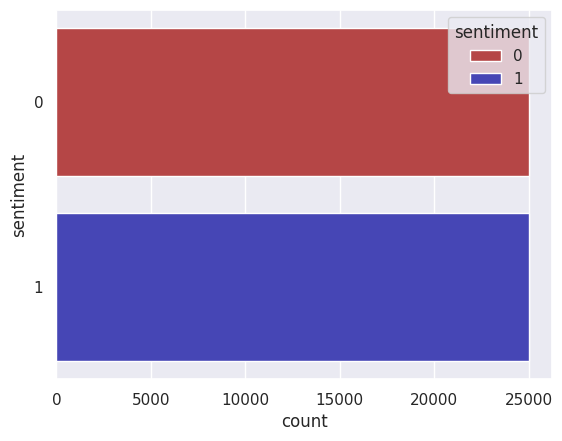

In [58]:
sns.set_theme(style="darkgrid")
sns.countplot(y='sentiment', data=base_treinamento, hue='sentiment', palette=['#c73333', '#3333c7']);

In [59]:
base_treinamento.drop(["id", "tweet_date", "query_used"], axis=1, inplace=True)

In [60]:
base_teste = pd.read_csv(f"{BASE_DIR}/Test.csv", delimiter=";")
print(base_teste.shape)
base_teste.sample(10)

(5000, 5)


,id,tweet_text,tweet_date,sentiment,query_used
3964,1030513433018593280,meu taetae não merece isso :(,Fri Aug 17 17:55:23 +0000 2018,0,:(
4748,1030524969887907842,logo hj que não vou sair :(,Fri Aug 17 18:41:13 +0000 2018,0,:(
3708,1030510054531891200,@_nandasantos1 Queria tá aí :(.,Fri Aug 17 17:41:57 +0000 2018,0,:(
2384,1029655819846148097,"ôh gente, vai ter parada gay aqui, e eu quero ...",Wed Aug 15 09:07:32 +0000 2018,1,:)
1847,1029585346709921793,@liddwll @orbit_yerim Tava sem nada pra fazer ...,Wed Aug 15 04:27:30 +0000 2018,1,:)
4043,1030514833538670595,@afonsomartingo Só cheguei há pouco :( tas por...,Fri Aug 17 18:00:57 +0000 2018,0,:(
4543,1030521805969207296,A voz do Quorthon mano :( https://t.co/vxhxqPC0Go,Fri Aug 17 18:28:39 +0000 2018,0,:(
2321,1029649819181244416,@AlbaBeltranNava @RiusPlay @Crafteosdedavid @M...,Wed Aug 15 08:43:41 +0000 2018,1,:)
4083,1030515381092470786,foi bem ruim eu lembrar que ano que vem nao vo...,Fri Aug 17 18:03:07 +0000 2018,0,:(
1599,1029573554411630595,síntesis pasando do i wanna know? :);),Wed Aug 15 03:40:38 +0000 2018,1,:)


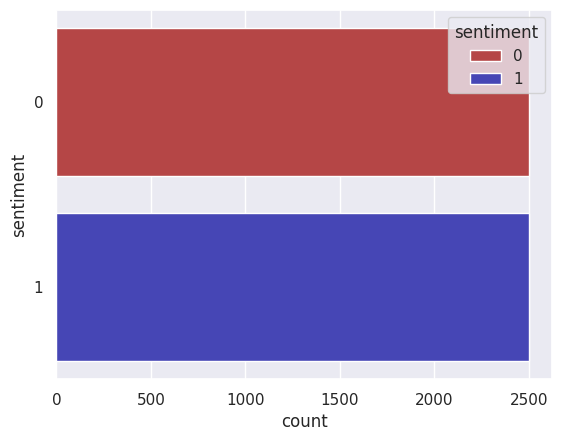

In [61]:
sns.countplot(y='sentiment', data=base_teste, hue='sentiment', palette=['#c73333', '#3333c7']);

### Pré-Processamento dos textos

- Letras minúsculas
- Nome do usuário (@)
- URLs
- Espaços em branco
- Emoticons
- Stop words
- Lematização
- Pontuações

In [62]:
pln = spacy.load("pt_core_news_sm")
STOP_WORDS = pln.Defaults.stop_words
print(STOP_WORDS, '\n', len(STOP_WORDS))

{'outros', 'fim', 'grupo', 'ademais', 'ela', 'tua', 'nossas', 'onze', 'fazes', 'oito', 'tudo', 'temos', 'após', 'depois', 'duas', 'final', 'for', 'iniciar', 'disso', 'meus', 'naquele', 'além', 'sois', 'possível', 'cima', 'parte', 'maiorias', 'também', 'de', 'têm', 'és', 'tiveste', 'próximo', 'tais', 'quer', 'lado', 'mal', 'mas', 'tenho', 'estará', 'aqueles', 'quais', 'pode', 'seria', 'fora', 'tu', 'quando', 'oitava', 'até', 'questão', 'sétimo', 'poderá', 'dizem', 'eventual', 'des', 'mesmo', 'aí', 'aquele', 'ali', 'vós', 'esta', 'dez', 'faz', 'maioria', 'novas', 'vindo', 'os', 'essas', 'então', 'qualquer', 'podem', 'tanto', 'deste', 'último', 'relação', 'vez', 'neste', 'a', 'tive', 'umas', 'conhecido', 'esses', 'breve', 'dos', 'poder', 'primeiro', 'em', 'novo', 'e', 'está', 'cedo', 'vinte', 'corrente', 'nosso', 'porque', 'somos', 'me', 'embora', 'que', 'foi', 'qual', 'vários', 'vossa', 'mês', 'quarto', 'meu', 'máximo', 'você', 'desde', 'assim', 'teve', 'tão', 'posso', 'cujo', 'coisa', '

In [63]:
def preprocessamento(texto):
  texto = texto.lower()

  # Remoção de Usuário
  texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", " ", texto)

  # Remoção de URL
  texto = re.sub(r"https?://[A-Za-z0-9./]+", " ", texto)

  # Espaços em branco (excesso)
  texto = re.sub(r" +", " ", texto)

  # Emoticons
  lista_emot = {":)": "emocaopositiva", ":d": "emoçãopositiva", ":(": "emocaonegativa", ":p": "emoçãopositiva"}

  for emo, emocao in lista_emot.items():
    texto = texto.replace(emo, emocao)

  # Lemma
  documento = pln(texto)
  lista = []
  for token in documento:
    lista.append(token.lemma_.lower().strip())

  # Stop Words
  lista = [palavra for palavra in lista if palavra not in STOP_WORDS]

  # Pontuação
  lista = [palavra for palavra in lista if palavra not in string.punctuation]

  lista = " ".join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

texto_teste = '@behin_d_curtain :D Para :( mim, http://www.iaexpert.com.br é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'
resultado = preprocessamento(texto_teste)
resultado

'emoçãopositivo emocaonegativo precisamente contrário emocaopositiva vir chuva vir disposição emocaopositivo'

In [64]:
base_treinamento.head(10)

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1
5,@KingJokerLeto mas amiga eu to aqui ainda :),1
6,"@RivasJairo Bravo, Jairo!!! :)))",1
7,@inquilinasls @Spotify socorro ksoaksosks acho...,1
8,"@chimekarlla gosto muito de fazenda :) , mas m...",1
9,Amanha vou ver venom :D,1


In [65]:
base_treinamento['tweet_text'] = base_treinamento['tweet_text'].apply(preprocessamento)

base_treinamento.head(10)

,tweet_text,sentiment
0,pessoa certo vale azevedo emocaopositivo,1
1,precisamente contrário emocaopositiva vir chuv...,1
2,video hoje ... pensar falar meta de o csgo pag...,1
3,aaaaaaaar amei polaroids expressar to apaixona...,1
4,valorizar coração de o menininho vc diferente ...,1
5,amiga to emocaopositivar,1
6,bravo jairo emocaopositivo,1
7,socorro ksoaksosks achar to em o caixinha som ...,1
8,gostar fazenda emocaopositivo morro medo galin...,1
9,amanha venom emoçãopositivo,1


### Tratamento da Classe

In [77]:
base_dados_treinamento_final = []
for texto, emocao in zip(base_treinamento['tweet_text'], base_treinamento['sentiment']):
  if emocao == 1:
    dic = ({'POSITIVO': True, 'NEGATIVO': False})
  elif emocao == 0:
    dic = ({'POSITIVO': False, 'NEGATIVO': True})

  base_dados_treinamento_final.append([texto, dic.copy()])
print(base_dados_treinamento_final[2100:2120])

[['conhecer rede preciso de o pessoa emocaopositiva pessoa falar outro pessoa ouvir falar de aquele plataforma 😂', {'POSITIVO': True, 'NEGATIVO': False}], ['passar por o joão a o fizemos ódio mútuo emocaopositiva', {'POSITIVO': True, 'NEGATIVO': False}], ['força guerreiro tomar ... deixes levar gente ... sorri erguer cabeça passo frente emocaopositivo 🇵 🇹 🇵 🇹 🇵 🇹 🇵 🇹', {'POSITIVO': True, 'NEGATIVO': False}], ['dia feriado emoçãopositiva', {'POSITIVO': True, 'NEGATIVO': False}], ['sair de o aula geografia apertar bochecha querido emocaopositiva', {'POSITIVO': True, 'NEGATIVO': False}], ['hey mama emocaopositivo', {'POSITIVO': True, 'NEGATIVO': False}], ['li verdade emocaopositivo', {'POSITIVO': True, 'NEGATIVO': False}], ['prêmio trouxa de o ano pra idiota emocaopositivo', {'POSITIVO': True, 'NEGATIVO': False}], ['compra.o passe emoçãopositivo', {'POSITIVO': True, 'NEGATIVO': False}], ['hoje cabelo tá merda p combinar comigo emocaopositivo', {'POSITIVO': True, 'NEGATIVO': False}], ['foo

### Criação do Classificador

In [67]:
modelo = spacy.blank("pt")
textcat = modelo.add_pipe("textcat")
textcat.add_label("POSITIVO")
textcat.add_label("NEGATIVO")
historico = []

In [69]:
modelo.begin_training()
for epoca in range(20):
  random.shuffle(base_dados_treinamento_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_treinamento_final, 512):
    examples = []

    for texto, entities in batch:
        doc = modelo.make_doc(texto)  # Create a Doc object from the text
        example = Example.from_dict(doc, {"cats": entities})
        examples.append(example)

    modelo.update(examples, losses=losses)
    historico.append(losses)
  if epoca % 5 == 0:
    print(losses)

{'textcat': 2.0004238459623593}
{'textcat': 0.0011543693748247196}
{'textcat': 7.044270154150646e-09}
{'textcat': 4.697431118276962e-09}


In [70]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [71]:
historico_loss = np.array(historico_loss)
print(historico_loss)

[2.00042385e+00 2.00042385e+00 2.00042385e+00 ... 3.71172962e-09
 3.71172962e-09 3.71172962e-09]


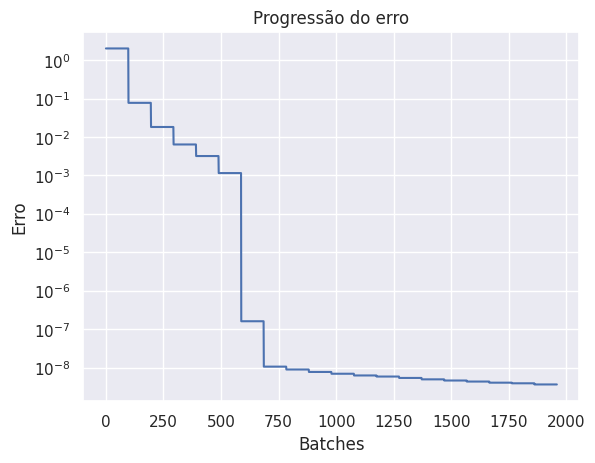

In [72]:
plt.plot(historico_loss)
plt.title("Progressão do erro")
plt.xlabel("Batches")
plt.ylabel("Erro")
# Set the y-axis to logarithmic scale
plt.yscale('log')

plt.show()

### Testes

In [74]:
#modelo_carregado = spacy.load('modelo')

texto_positivo = base_teste['tweet_text'][21]
print(texto_positivo)
#previsao = modelo_carregado(texto_positivo)
previsao = modelo(texto_positivo)
print(previsao, previsao.cats)

@duda_tn fico feliz sabendo q é recíproco :))
@duda_tn fico feliz sabendo q é recíproco :)) {'POSITIVO': 0.9999585151672363, 'NEGATIVO': 4.151142275077291e-05}


In [83]:
texto_positivo = 'eu gosto muito de evitar você'
texto_positivo = preprocessamento(texto_positivo)
print(texto_positivo, modelo(texto_positivo).cats)

gostar evitar {'POSITIVO': 0.9982983469963074, 'NEGATIVO': 0.001701684552244842}


In [85]:
base_teste['tweet_text'][4000]
texto_negativo = base_teste['tweet_text'][4000]
previsao = modelo(texto_negativo)
print(texto_negativo, previsao.cats)

Tô bem triste do filme da Mulan não ter o Mushu :( {'POSITIVO': 0.011041511781513691, 'NEGATIVO': 0.988958477973938}


### Avaliação do Modelo

In [89]:
previsoes = []
for texto in base_treinamento['tweet_text']:
  previsao = modelo(texto)
  previsoes.append(previsao.cats)

In [90]:
print(previsoes)

[{'POSITIVO': 1.0, 'NEGATIVO': 1.4374339052380947e-08}, {'POSITIVO': 1.0, 'NEGATIVO': 1.0823634433165807e-08}, {'POSITIVO': 1.0, 'NEGATIVO': 9.914534082611226e-09}, {'POSITIVO': 1.0, 'NEGATIVO': 1.0181623544269769e-08}, {'POSITIVO': 1.0, 'NEGATIVO': 8.854033950456142e-09}, {'POSITIVO': 1.0, 'NEGATIVO': 1.3780387497774882e-08}, {'POSITIVO': 1.0, 'NEGATIVO': 1.2622917822113777e-08}, {'POSITIVO': 1.0, 'NEGATIVO': 6.810644492816209e-09}, {'POSITIVO': 1.0, 'NEGATIVO': 3.274179860568438e-08}, {'POSITIVO': 1.0, 'NEGATIVO': 5.219910725884347e-09}, {'POSITIVO': 1.0, 'NEGATIVO': 5.753588272483512e-09}, {'POSITIVO': 1.0, 'NEGATIVO': 2.4826729116966817e-08}, {'POSITIVO': 1.0, 'NEGATIVO': 7.796893797262783e-09}, {'POSITIVO': 1.0, 'NEGATIVO': 4.496369498951935e-09}, {'POSITIVO': 1.0, 'NEGATIVO': 6.014329034798038e-09}, {'POSITIVO': 1.0, 'NEGATIVO': 1.2446290220680112e-08}, {'POSITIVO': 1.0, 'NEGATIVO': 1.3051314695644578e-08}, {'POSITIVO': 1.0, 'NEGATIVO': 3.670692905188844e-08}, {'POSITIVO': 0.9999

In [91]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)
respostas_reais = base_treinamento['sentiment'].values

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

0.99994

<Axes: >

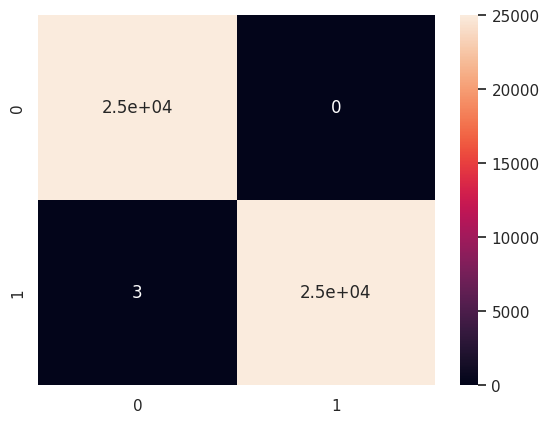

In [93]:
cm = confusion_matrix(respostas_reais, previsoes_final)
sns.heatmap(cm, annot=True)

Utilizando base de teste:

In [96]:
previsoes = []
for texto in base_teste['tweet_text']:
  previsao = modelo(texto)
  previsoes.append(previsao.cats)

In [97]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

previsoes_final = np.array(previsoes_final)
respostas_reais = base_teste['sentiment'].values

print(accuracy_score(respostas_reais, previsoes_final))

0.63


<Axes: >

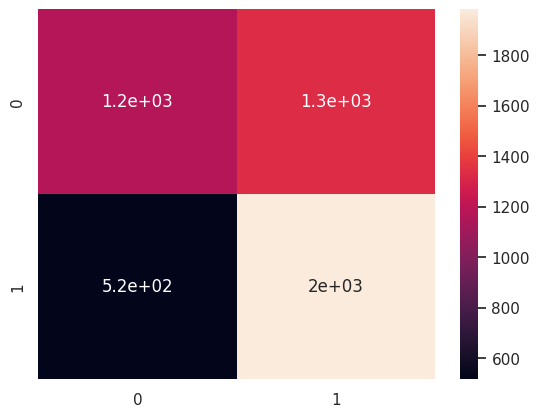

In [98]:
cm = confusion_matrix(respostas_reais, previsoes_final)
sns.heatmap(cm, annot=True)